**Fin 585R**  
**Diether**  
**Problem Set**  
**Time Series Tests of the CAPM**  

**Overview**  

In this problem set you test the CAPM using the time series framework. Specifically, you test whether the CAPM holds with respect to *momentum portfolios* (Jegadeesh and Titman, 1993, "Returns to Buying Winners and Selling Losers: Implications for Stock Market Efficiency") using the **time series testing framework.** Momentum portfolios are formed based on past returns. Specifically, momentum portfolios are most commonly formed based on the cumulative return from months $t-12$ to $t-2$:

$$
r_{i,t-12:t-2} \approx \sum_{x=2}^{12} \log(1+r_{i,t-x})
$$

I formed equal-weight momentum portfolios for you; the portfolios are available for download on *Learning Suite* or you can download it directly from the following link: [momentum portfolios](https://diether.org/prephd/10-port_mom_ew.csv)). Note, that in my data the returns for these portfolios are in percent; I have multiplied the raw returns by 100. Also, to test the CAPM you are going to need a proxy for the market portfolio and for the riskfree rate. Data from these can be found at [Ken French's Data Library](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html). For your convenience I have created a csv file that contains both these variables, and it can be loaded directly into a dataframe from my website (see the code below). The `dataframe` contains the excess return on a proxy for the market portfolio (`exmkt`), a proxy for the riskfree rate (`rf`), and some other portfolios you can ignore. The returns from Ken French's library are also in percent: raw returns multiplied by 100.

For questions that require some write-up, create a markdown cell (use the Cell Toolbar)  and write your answer in the markdown cell (this cell is a markdown cell and here is a [markdown cheat sheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)). 

**Tasks and Questions**  

1. Compute and report the sample mean, standard deviation, and t-test for the mean = 0 for the *excess returns* of the momentum portfolios ($r_p-r_f$). <br><br>

2. Test the CAPM by running a time series CAPM regression for each of the momentum portfolios: <br><br>
$$
r_{pt} - r_{ft} = \alpha_p + \beta_{pM}( r_{Mt} - r_{ft}) + \epsilon_{it}
$$
<br>Consolidate all your regression results into one table (hint, go take a look at the jupyter notebook on estimating regressions in `pandas` and `statsmodels`). <br><br>

3. Interpret the regression results from question 2). What can you infer? Can you reject that
the CAPM holds? Is the market portfolio the tangency portfolio? <br><br>

4. Create a spread portfolio:<br><br>
$$
r_{spread,t} = r_{4t} - r_{0t}.
$$
<br>Test the CAPM using this portfolio. Can you reject the CAPM?<br><br>

5. Estimate the security market line using the data available for this homework. Specifically, estimate the following line:  <br><br>
$$
E(r_p) = r_f + \beta_{p}\bigl[E(r_M) - r_f\bigr]
$$
<br> You don't need to plot the estimated line, but report your estimates of $r_f$ and $E(r_M) - r_f$. <br><br>

6. Why is the intercept in time series CAPM regression called an *average abnormal return*? Briefly explain.

In [34]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
from finance_byu.summarize import summary
import matplotlib.pyplot as plt

In [35]:
port = pd.read_csv('https://diether.org/prephd/10-port_mom_ew.csv',parse_dates=['caldt'])
port

,caldt,p0,p1,p2,p3,p4
0,1927-01-31,-2.708397,4.290747,0.739797,1.276721,0.475348
1,1927-02-28,6.142965,8.298616,4.973540,4.677752,5.513792
2,1927-03-31,-3.983700,-2.796319,-1.576885,-0.254076,0.292605
3,1927-04-30,-0.120049,-1.157099,-0.031457,-0.344379,3.240603
4,1927-05-31,3.676704,6.496045,7.446533,7.156608,8.589417
...,...,...,...,...,...,...
1156,2023-05-31,2.281258,-0.782815,-3.121311,-1.235714,-0.531051
1157,2023-06-30,7.551743,8.675296,6.963804,5.565225,7.316396
1158,2023-07-31,11.188892,7.892640,5.822924,2.665359,2.517387
1159,2023-08-31,-8.346048,-6.264764,-4.634235,-2.841490,-3.650955


In [36]:
fac = pd.read_csv('https://diether.org/prephd/10-factors.csv',parse_dates=['caldt'])
fac

,caldt,exmkt,smb,hml,umd,rf
0,1927-01-31,-0.06,-0.37,4.54,0.36,0.25
1,1927-02-28,4.18,0.04,2.94,-2.14,0.26
2,1927-03-31,0.13,-1.65,-2.61,3.61,0.30
3,1927-04-30,0.46,0.30,0.81,4.30,0.25
4,1927-05-31,5.44,1.53,4.73,3.00,0.30
...,...,...,...,...,...,...
1156,2023-05-31,0.35,1.61,-7.72,-0.63,0.36
1157,2023-06-30,6.46,1.54,-0.26,-2.37,0.40
1158,2023-07-31,3.21,2.08,4.11,-3.98,0.45
1159,2023-08-31,-2.39,-3.16,-1.06,3.77,0.45


In [37]:
df = port.copy()

df['p0'] = port['p0'] - fac['rf']
df['p1'] = port['p1'] - fac['rf']
df['p2'] = port['p2'] - fac['rf']
df['p3'] = port['p3'] - fac['rf']
df['p4'] = port['p4'] - fac['rf']

summary(df).loc[['count','mean','std','tstat']]

,p0,p1,p2,p3,p4
count,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000
mean,0.112194,0.586835,0.822802,0.997468,1.295244
std,8.990257,7.089315,6.258873,5.830107,6.615348
tstat,0.425220,2.820511,4.479355,5.829596,6.671371


In [38]:
from finance_byu.regtables import Regtable

In [39]:
df['exmkt'] = fac['exmkt']

p0 = sm.ols('p0 ~ 1 + exmkt',data = df).fit()
p1 = sm.ols('p1 ~ 1 + exmkt',data = df).fit()
p2 = sm.ols('p2 ~ 1 + exmkt',data = df).fit()
p3 = sm.ols('p3 ~ 1 + exmkt',data = df).fit()
p4 = sm.ols('p4 ~ 1 + exmkt',data = df).fit()

tab = Regtable([p0,p1,p2,p3,p4], stat = 'tstat', sig = 'coeff')
tab.render()

,p0,p1,p2,p3,p4
Intercept,-0.866***,-0.223***,0.094,0.317***,0.570***
,(-6.67),(-2.64),(1.42),(5.23),(6.11)
exmkt,1.465***,1.213***,1.093***,1.019***,1.086***
,(60.87),(77.71),(89.57),(90.68),(62.74)
obs,1161,1161,1161,1161,1161
Rsq,0.76,0.84,0.87,0.88,0.77



While the regressions suggest that the portfolios are exposed to market risk as predicted by CAPM, the presence of significant intercepts (alphas) in most models raises doubts about the validity of CAPM in explaining the expected returns fully. Further analysis and testing may be necessary to draw conclusive inferences about the CAPM and the tangency portfolio.

In [42]:
df['spread'] = df['p4'] - df['p0']

spread = sm.ols('spread ~ 1 + exmkt',data = df).fit()
spread.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 spread   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     168.3
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           4.97e-36
Time:                        14:13:00   Log-Likelihood:                -3590.1
No. Observations:                1161   AIC:                             7184.
Df Residuals:                    1159   BIC:                             7194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4363      0.158      9.104      0.000       1.127       1.746
exmkt         -0.3794      0.029    -12.972      0.000      -0.437      -0.322
==============================================================================
Omnibus:                      512.381   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7241.060
Skew:                          -1.652   Prob(JB):                         0.00
Kurtosis:                      14.780   Cond. No.                         5.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The intercept is strongly significantly different from 0. So we reject the CAPM

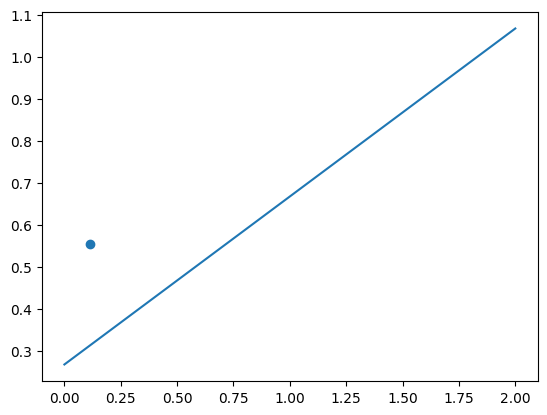

In [51]:
erm = fac['exmkt'].mean()
rf = fac['rf'].mean()

beta = np.linspace(0,2)

e0 = 0.112194 + beta * (erm -  0.112194)
e1 = 0.586835 + beta *(erm - 0.586835)
e2 = 0.822802 + beta * (erm - 0.822802)
e3 = 0.997468 + beta * (erm - 0.997468) 
e4 = 1.295244 + beta * (erm - 1.295244)

erp = rf + beta* (erm - rf )
				


plt.plot(beta,e0, label = 'e0')
plt.plot(beta,e1, label = 'e1')
plt.plot(beta,e2, label = 'e2')
plt.plot(beta,e3, label = 'e3')
plt.plot(beta,e4, label = 'e4')

plt.legend()



It signifies the average excess return of an asset or portfolio beyond what is predicted by its beta with the market. This abnormal return reflects performance deviations that cannot be attributed to systematic market risk alone, indicating either outperformance or underperformance relative to expectations. Positive intercepts imply average outperformance, while negative intercepts denote underperformance. The term underscores the presence of factors other than market risk, such as firm-specific attributes or investor strategies, influencing asset returns.